### Problem Statement

Banks receive thousands of loan applications every month. Assessing whether an applicant is eligible for a loan is a critical decision that directly affects financial risk. Traditionally, this evaluation depends on factors like income, age, loan amount, credit score, marital status, education level, and gender.

The objective of this project is to develop a **predictive model using Logistic Regression** that can automatically determine whether a loan application should be approved or not, based on the applicant’s profile.

By analyzing historical loan approval data, the model should learn patterns and relationships between applicant features (such as `Age`, `Income`, `LoanAmount`, `CreditScore`, `Married`, `Education`, and `Gender`) and the target variable `Approved`. Once trained, this model can be used to predict loan approval outcomes for new applicants.

### Goals

1. Understand and preprocess mixed-type data (numerical + categorical).
2. Build a Logistic Regression pipeline using Scikit-learn to automate preprocessing and modeling.
3. Evaluate the model using accuracy, confusion matrix, and classification report metrics.
4. Interpret the model’s coefficients to understand which factors most influence loan approval decisions.

### Expected Outcome

A well-performing Logistic Regression model capable of classifying whether a loan will be **approved (1)** or **not approved (0)**, providing the bank with a data-driven tool for faster and more consistent loan evaluations.


**1) Import Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [40]:
df = pd.read_csv("/content/loan_approval_dataset.csv")

In [41]:
df.columns = df.columns.str.strip()

In [42]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [43]:
new_df = df.copy()

In [44]:
new_df = new_df.drop("loan_id", axis = "columns")

In [45]:
new_df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


**2) Exploratory Data Analysis**

In [46]:
print("\n--- Missing Values ---\n", df.isnull().sum())
print("\n--- Data Types ---\n", df.dtypes)
print("\n--- Descriptive Statistics ---\n", df.describe())


--- Missing Values ---
 loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

--- Data Types ---
 loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

--- Descriptive Statistics ---
            loan_id  no_of_dependents  income_annu

In [47]:
new_df["residential_assets_value"] = new_df["residential_assets_value"].clip(lower = 0)

In [ ]:
''' loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object

**3) Univariate And Bivariate Analysis**

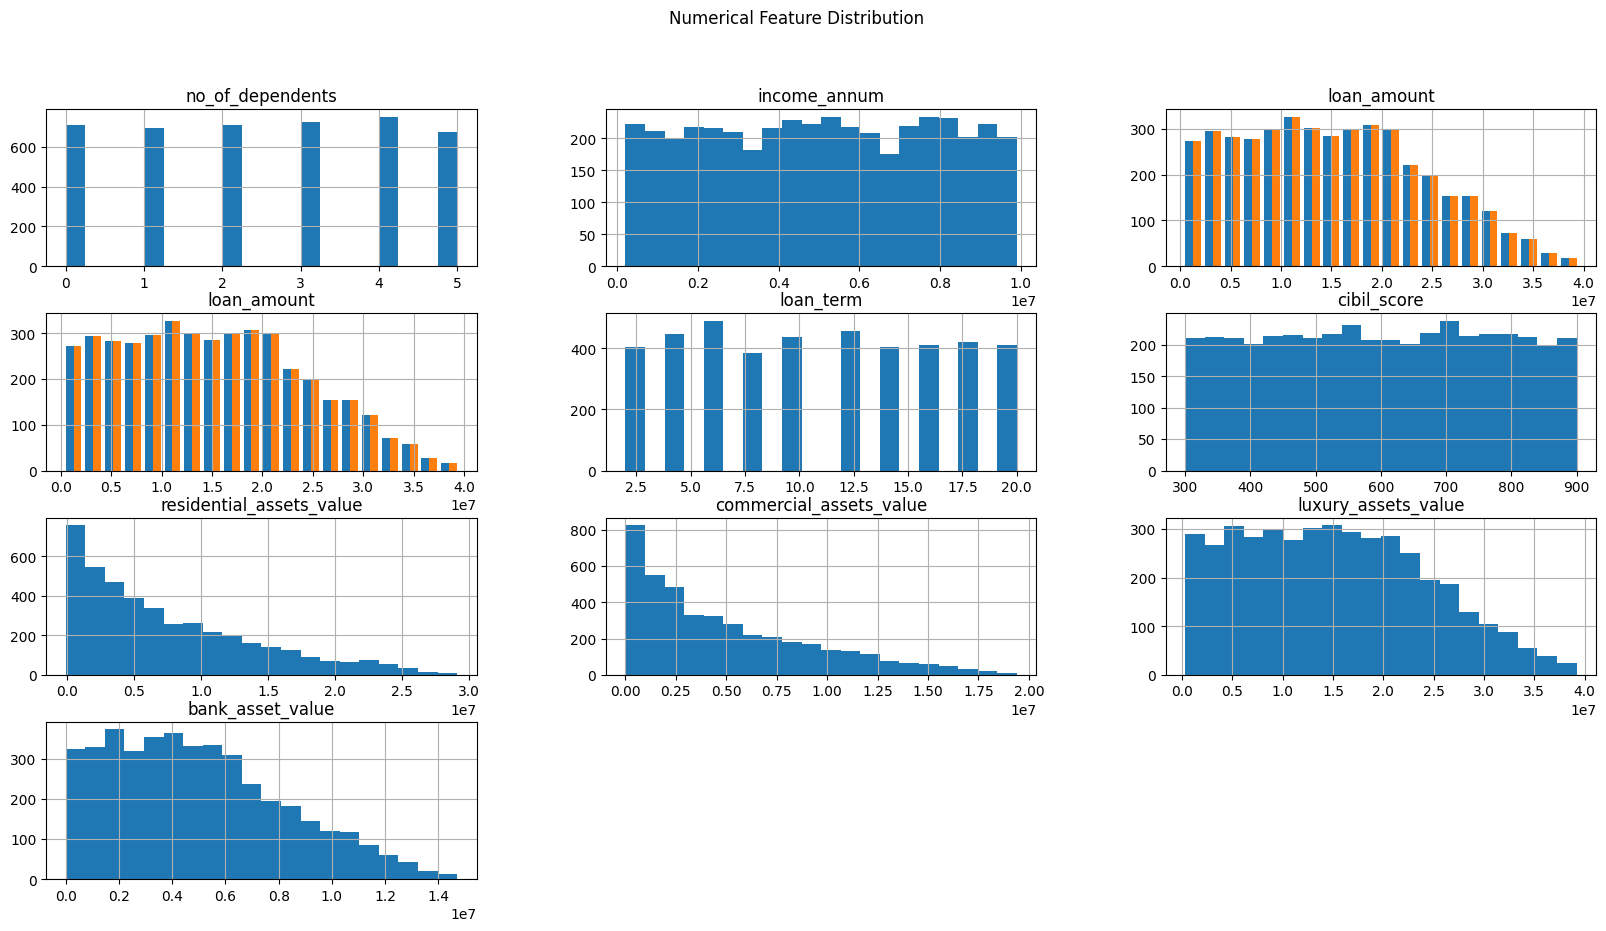

In [48]:
# Univariate Analysis on Numerical Columns
num_cols = ["no_of_dependents", "income_annum", "loan_amount", "loan_amount", "loan_term", "cibil_score", "residential_assets_value",
            "commercial_assets_value", "luxury_assets_value", "bank_asset_value"]
df[num_cols].hist(figsize= (20, 10), bins = 20)
plt.ylabel("Count")
plt.suptitle("Numerical Feature Distribution")
plt.show()


**Observations:**

/tmp/ipython-input-867451518.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cols, data = new_df, palette = "Set2")


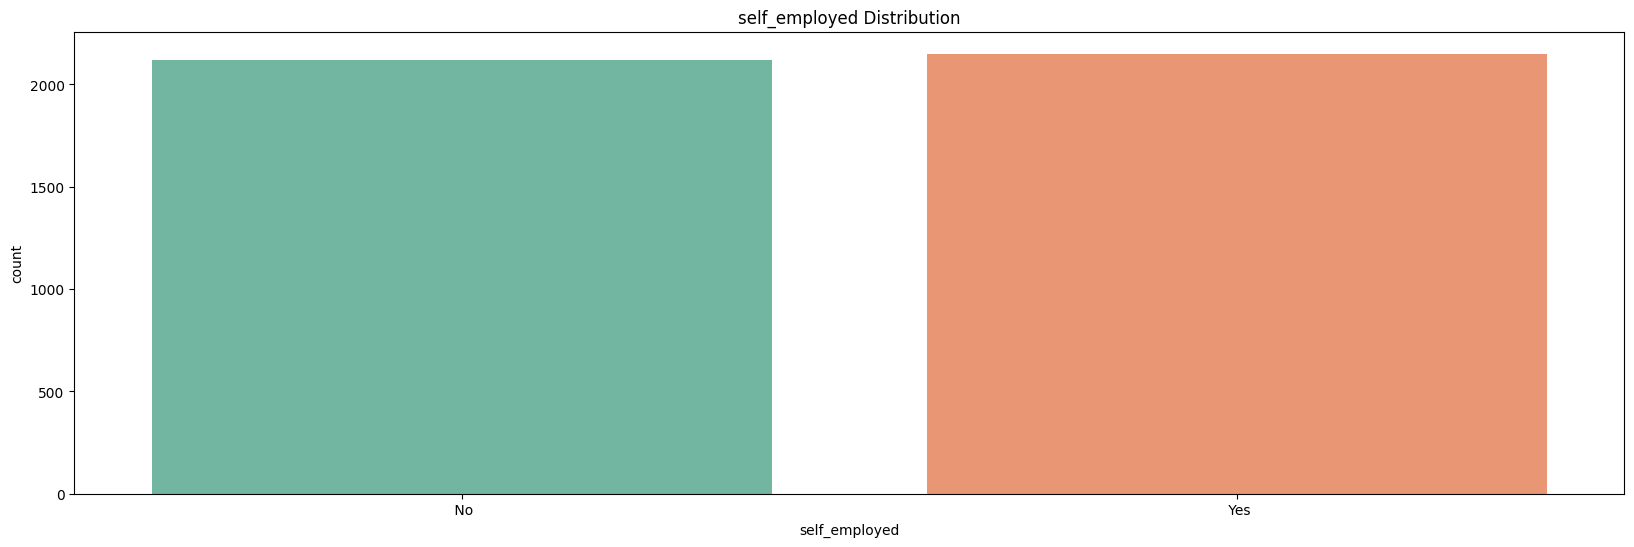

/tmp/ipython-input-867451518.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cols, data = new_df, palette = "Set2")


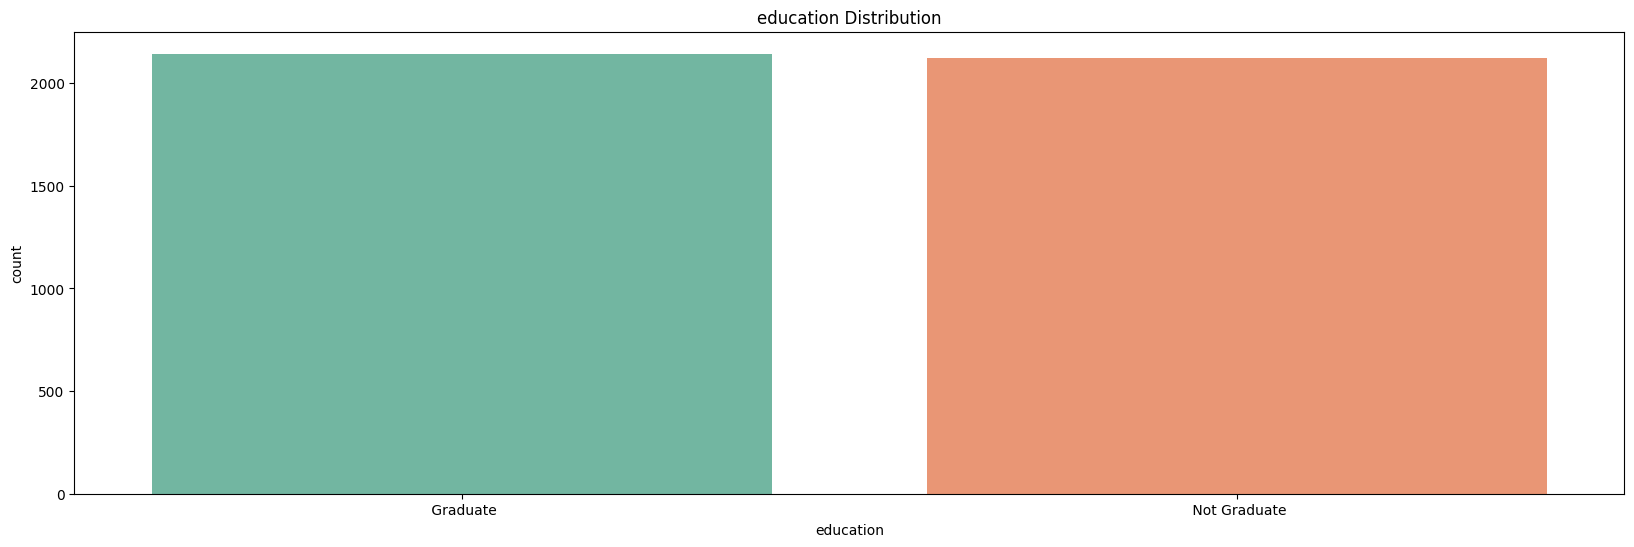

/tmp/ipython-input-867451518.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cols, data = new_df, palette = "Set2")


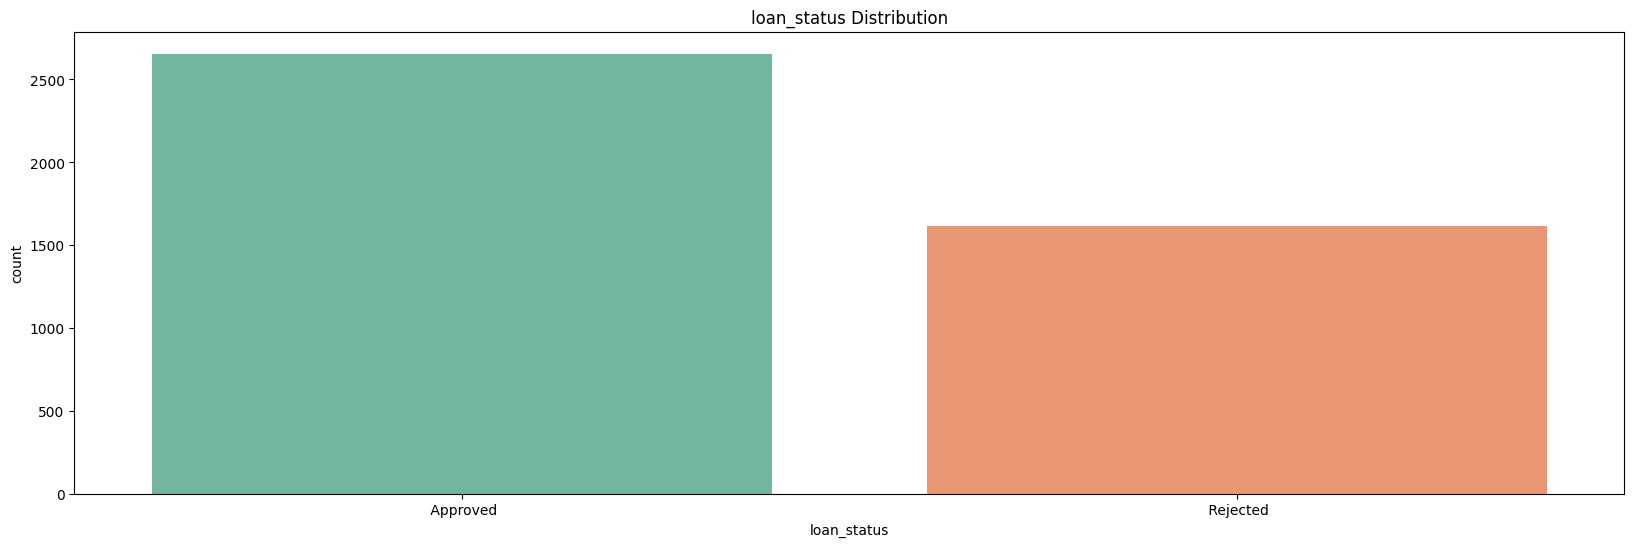

In [51]:
# Univariate Analysis on Categorical Columns
cat_cols = ["self_employed", "education", "loan_status"]
for cols in cat_cols:
  plt.figure(figsize = (20,6))
  sns.countplot(x=cols, data = new_df, palette = "Set2")
  plt.title(f"{cols} Distribution")
  plt.show()

/tmp/ipython-input-1327711259.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


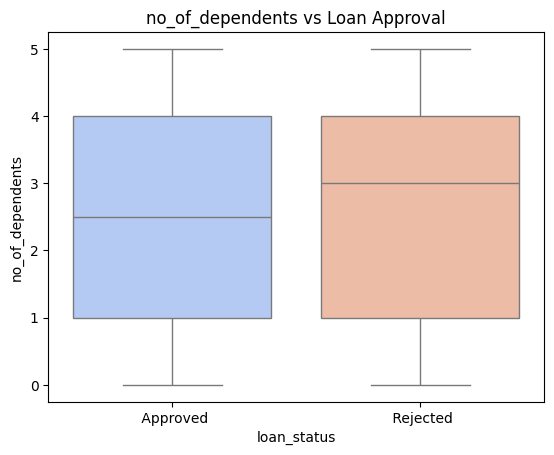

/tmp/ipython-input-1327711259.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


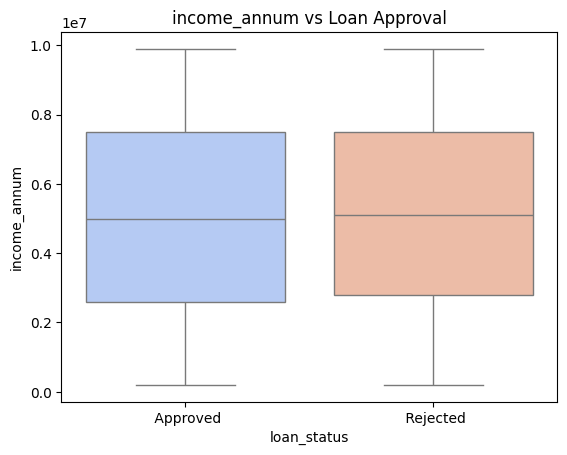

/tmp/ipython-input-1327711259.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


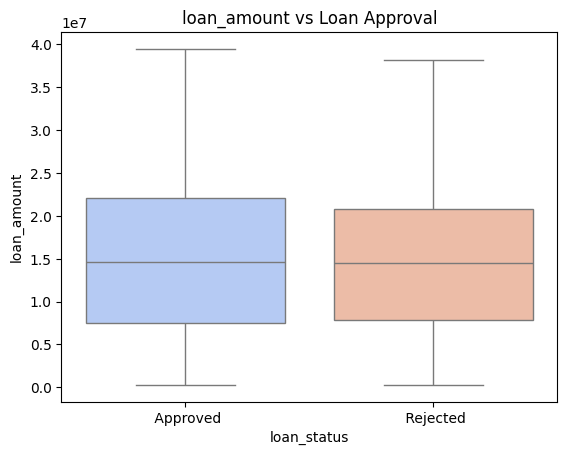

/tmp/ipython-input-1327711259.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


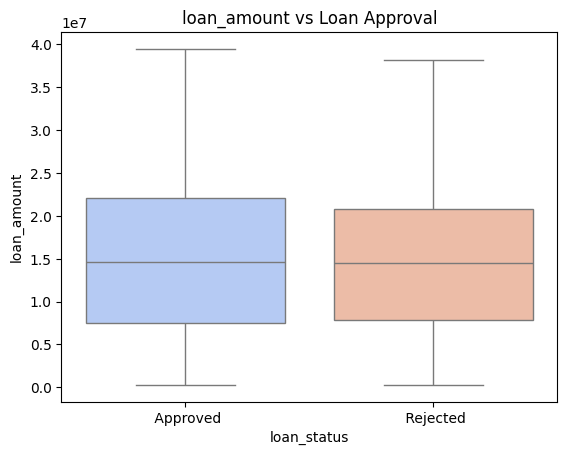

/tmp/ipython-input-1327711259.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


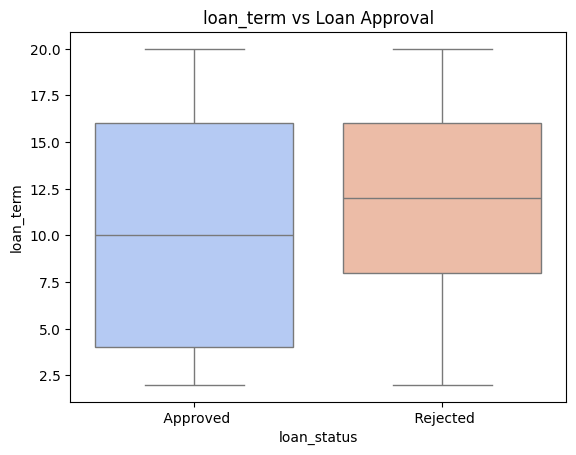

/tmp/ipython-input-1327711259.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


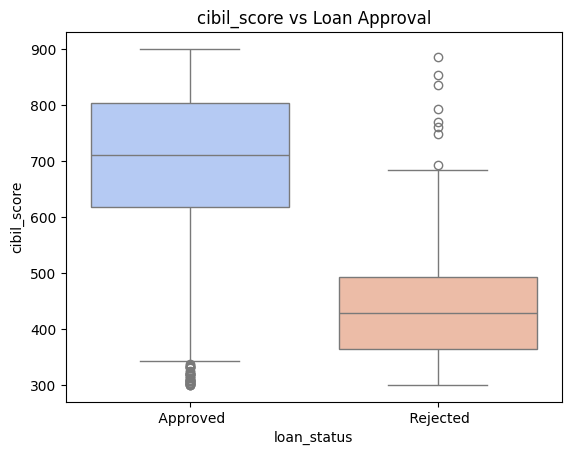

/tmp/ipython-input-1327711259.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


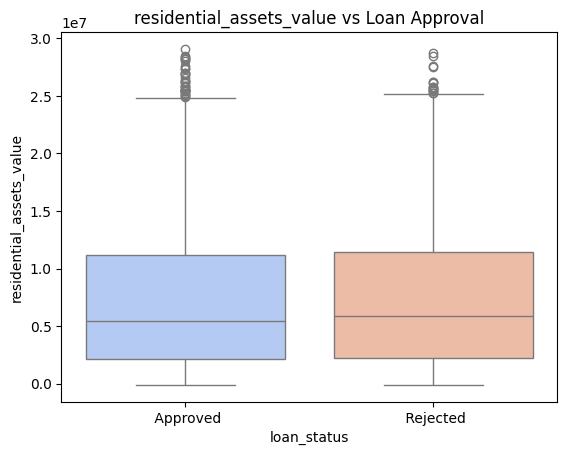

/tmp/ipython-input-1327711259.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


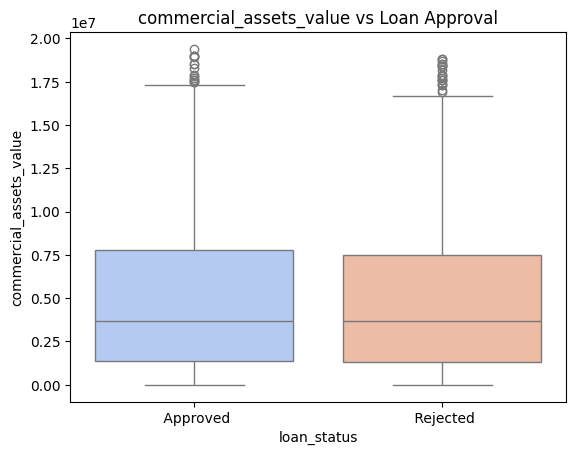

/tmp/ipython-input-1327711259.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


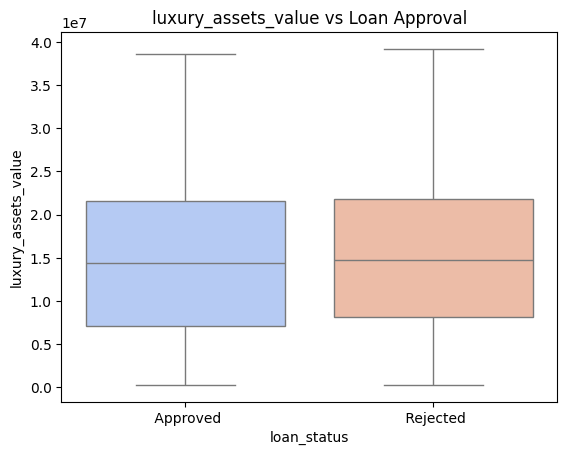

/tmp/ipython-input-1327711259.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')


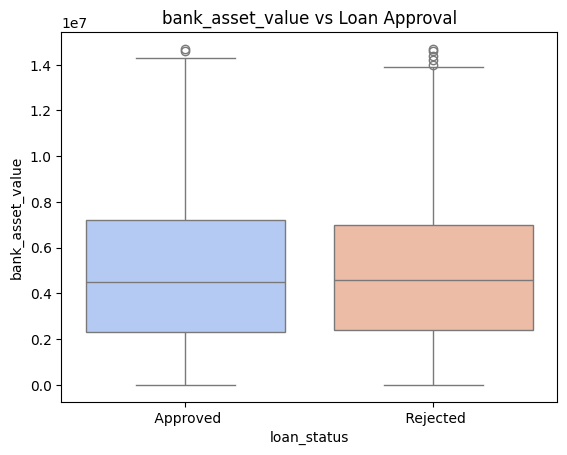

In [52]:
# Bivariate Analysis
for col in num_cols:
    sns.boxplot(x='loan_status', y=col, data=df, palette='coolwarm')
    plt.title(f'{col} vs Loan Approval')
    plt.show()


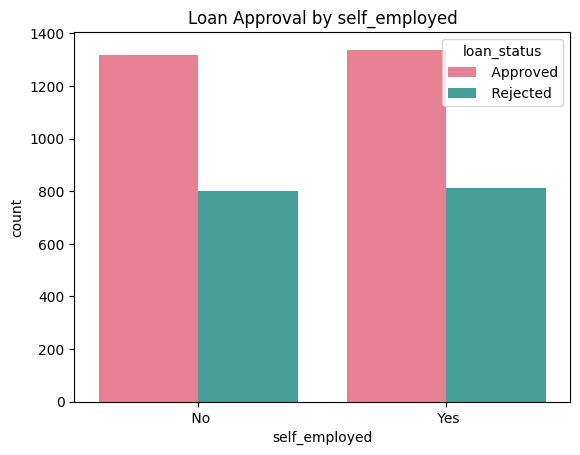

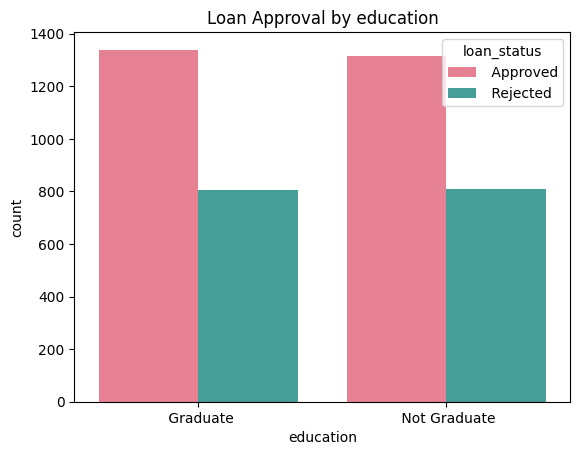

In [53]:
for col in ['self_employed', 'education']:
    sns.countplot(x=col, hue='loan_status', data=df, palette='husl')
    plt.title(f'Loan Approval by {col}')
    plt.show()


In [54]:
new_df.head(2)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected


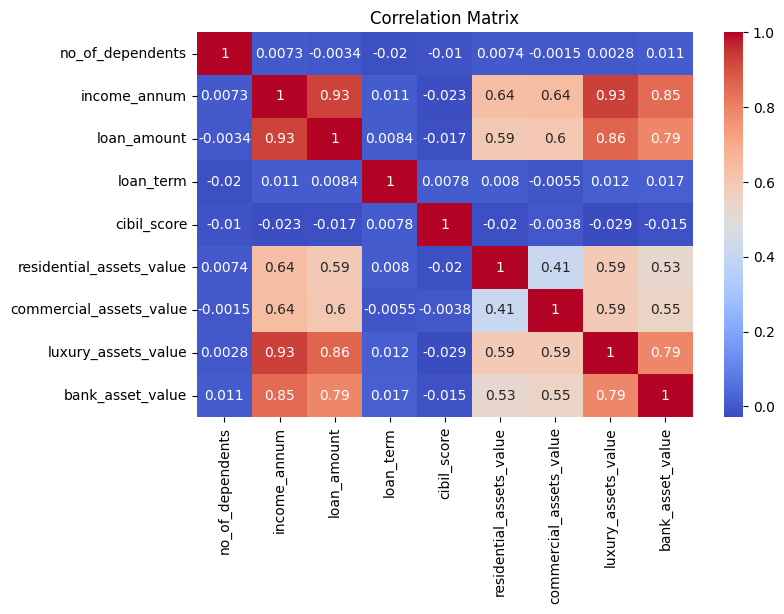

In [55]:
# Correlation
plt.figure(figsize=(8,5))
sns.heatmap(new_df.corr(numeric_only= True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Observations:**





**4) Preprocessing + Pipeline Setup**

In [69]:
x = new_df.drop("loan_status", axis = "columns")
y = new_df["loan_status"]

numeric_features = ["no_of_dependents", "income_annum", "loan_amount", "loan_amount", "loan_term", "cibil_score", "residential_assets_value",
            "commercial_assets_value", "luxury_assets_value", "bank_asset_value"]
categorical_features = ["self_employed", "education"]
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop = "first")

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

**5) Build Pipeline with Logistic Regression**

In [70]:
pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter = 500))
])

**6) Train Test Split**

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [72]:
print("size of X_train", X_train.shape)
print("size of X_test", X_test.shape)
print("size of Y_train", Y_train.shape)
print("size of Y_test", Y_test.shape)


size of X_train (2988, 11)
size of X_test (1281, 11)
size of Y_train (2988,)
size of Y_test (1281,)


**7) Training the Model**

In [73]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['no_of_dependents',
                                                   'income_annum',
                                                   'loan_amount', 'loan_amount',
                                                   'loan_term', 'cibil_score',
                                                   'residential_assets_value',
                                                   'commercial_assets_value',
                                                   'luxury_assets_value',
                                                   'bank_asset_value']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['self_employed',
                                                   'education'])])),
                ('classifier', LogisticRegression(max_iter=500))])

In [74]:
Y_pred = pipeline.predict(X_test)

In [75]:
Y_pred

array([' Rejected', ' Approved', ' Rejected', ..., ' Approved',
       ' Rejected', ' Approved'], dtype=object)

In [76]:
print("\n--- Model Performance ---")
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


--- Model Performance ---
Accuracy: 0.9024199843871975

Confusion Matrix:
 [[746  64]
 [ 61 410]]

Classification Report:
               precision    recall  f1-score   support

    Approved       0.92      0.92      0.92       810
    Rejected       0.86      0.87      0.87       471

    accuracy                           0.90      1281
   macro avg       0.89      0.90      0.90      1281
weighted avg       0.90      0.90      0.90      1281



**Observation:**

The Accuracy of our model is around 90%, (will try to enhance it upto ~80 to ~85%)

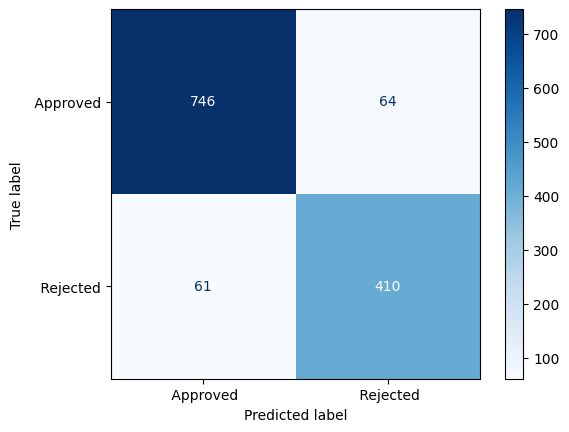

In [78]:
# 1Compute the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Display the matrix with class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap='Blues', values_format='d')

**Observation:**



*   746 times our model predicted approved when actually the loan was approved.

*   61 times our model predicted  approved when actually the loan was rejected.

*  410 times our model predicted rejected when actually the loan was rejected


*   64 times our model predicted Rejected when actually the loan was approved



In [79]:
import joblib

# Save model
joblib.dump(pipeline, "loan_prediction_model.pkl")


['loan_prediction_model.pkl']

In [80]:
import pickle
with open("loan_prediction_model.pkl", "wb") as file:
    pickle.dump(pipeline, file)
